# INFO 623 Social Network Analytics
# Project

Authors:

> Bob Ma (bm3336@drexel.edu)


In [1]:
# !pip install networkx

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

## import libraries

In [3]:
import networkx as nx
import pandas as pd
import numpy as np
from pprint import pprint
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from itertools import combinations
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import euclidean_distances
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
tqdm.pandas()
import os

## read data

Data source:  [SNAP: Network datasets: Wikipedia Article Networks (stanford.edu)](https://snap.stanford.edu/data/twitch-social-networks.html)

define path to data

In [4]:
## for use on colab
# path_google_drive = '/content/gdrive/MyDrive'
# path_workspace = os.path.join(path_google_drive,'INFO623_Project')

## for local use
path_workspace = './'

path_data = os.path.join(path_workspace,'data')
path_result = os.path.join(path_workspace,'result')

In [5]:
os.listdir(path_data)

['.gitkeep', 'twitch', 'twitch_egos', 'twitch_gamers']

In [6]:
df_edges = pd.read_csv(os.path.join(path_data,'twitch/ENGB/musae_ENGB_edges.csv'))
df_features = pd.read_csv(os.path.join(path_data,'twitch/ENGB/musae_ENGB_target.csv'))


In [7]:
df_edges

,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986
...,...,...
35319,6922,7122
35320,6562,7089
35321,7069,7070
35322,7069,7110


In [8]:
df_features

,id,days,mature,views,partner,new_id
0,73045350,1459,False,9528,False,2299
1,61573865,1629,True,3615,False,153
2,171688860,411,True,46546,False,397
3,117338954,953,True,5863,False,5623
4,135804217,741,True,5594,False,5875
...,...,...,...,...,...,...
7121,23831198,2624,False,3174,False,3794
7122,41433855,2035,True,3158,False,6534
7123,75862831,1418,True,3839,False,2041
7124,41041370,2046,True,6208,False,6870


In [9]:
G_twitch_en = nx.DiGraph()

In [10]:
np.max(df_edges['from'])

7125

In [11]:
np.min(df_edges['from'])

0

In [12]:
df_features['new_id'].value_counts()

new_id
2299    1
2672    1
7050    1
177     1
55      1
       ..
2290    1
6524    1
4886    1
7076    1
3919    1
Name: count, Length: 7126, dtype: int64

## Create network

In [13]:
G_twitch_en.add_edges_from(df_edges.values)

In [14]:
ls_nodes = list(G_twitch_en.nodes())
ls_nodes.sort()

In [15]:
len(ls_nodes)

7126

In [16]:
# %matplotlib inline
# # Visualize the graph
# plt.figure(figsize=(10, 10))

# pos = nx.spring_layout(G_twitch_en)
# nx.draw_networkx(G_twitch_en, pos, with_labels=False, node_size=10, arrowsize=2, alpha=0.05)
# plt.savefig(os.path.join(path_result,'network_twitch.png'))
# plt.show()

In [17]:
nx.to_pandas_adjacency(G_twitch_en,nodelist = ls_nodes)

,0,1,2,3,4,5,6,7,8,9,...,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
nx.to_pandas_edgelist(G_twitch_en)

,source,target
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986
...,...,...
35319,6444,6663
35320,6476,6777
35321,6503,7069
35322,6595,5215


### Degree

In [19]:
degrees = [degree for node, degree in G_twitch_en.degree()]
degrees

[6,
 6,
 18,
 4,
 22,
 26,
 10,
 1,
 3,
 5,
 22,
 32,
 8,
 13,
 465,
 4,
 10,
 43,
 4,
 10,
 1,
 336,
 7,
 18,
 15,
 60,
 6,
 5,
 2,
 12,
 1,
 78,
 4,
 186,
 147,
 26,
 10,
 10,
 29,
 36,
 48,
 6,
 3,
 12,
 4,
 14,
 11,
 2,
 6,
 2,
 1,
 10,
 12,
 31,
 720,
 140,
 6,
 9,
 62,
 81,
 47,
 137,
 54,
 63,
 1,
 3,
 4,
 21,
 14,
 23,
 36,
 2,
 3,
 1,
 12,
 22,
 32,
 17,
 23,
 27,
 11,
 6,
 23,
 9,
 18,
 58,
 19,
 1,
 691,
 10,
 11,
 85,
 54,
 15,
 48,
 2,
 199,
 6,
 21,
 10,
 8,
 13,
 36,
 7,
 115,
 11,
 5,
 11,
 23,
 56,
 2,
 10,
 13,
 5,
 1,
 13,
 151,
 13,
 155,
 8,
 21,
 14,
 6,
 1,
 11,
 4,
 5,
 182,
 12,
 11,
 14,
 12,
 11,
 9,
 5,
 18,
 8,
 43,
 11,
 5,
 4,
 252,
 73,
 378,
 2,
 91,
 9,
 97,
 7,
 43,
 4,
 10,
 14,
 26,
 8,
 9,
 7,
 15,
 50,
 6,
 28,
 32,
 24,
 6,
 7,
 24,
 113,
 51,
 4,
 73,
 6,
 43,
 2,
 7,
 29,
 5,
 6,
 65,
 27,
 38,
 57,
 20,
 39,
 37,
 31,
 19,
 11,
 35,
 18,
 30,
 49,
 38,
 23,
 7,
 22,
 8,
 55,
 18,
 93,
 20,
 61,
 20,
 52,
 21,
 39,
 43,
 44,
 83,
 37,
 62,
 103

mean degree

In [20]:
mean_degree = sum(degrees) / len(degrees)
print("mean degree:",mean_degree)

mean degree: 9.914117316867808


varian of degree

In [21]:
variance_degree = sum((d - mean_degree) ** 2 for d in degrees) / len(degrees)
print("variance of degree:", variance_degree)

variance of degree: 492.33868085859405


degree distribution

In [22]:
nx.degree_histogram(G_twitch_en)

[0,
 1161,
 979,
 761,
 605,
 458,
 377,
 283,
 272,
 220,
 205,
 193,
 155,
 131,
 122,
 103,
 81,
 83,
 78,
 54,
 67,
 58,
 32,
 45,
 42,
 43,
 29,
 38,
 24,
 13,
 24,
 19,
 18,
 22,
 14,
 16,
 8,
 16,
 10,
 10,
 11,
 13,
 11,
 11,
 13,
 4,
 9,
 5,
 5,
 6,
 5,
 2,
 2,
 4,
 7,
 4,
 9,
 8,
 4,
 3,
 2,
 2,
 3,
 3,
 5,
 2,
 3,
 2,
 5,
 2,
 1,
 0,
 3,
 6,
 5,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 4,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 

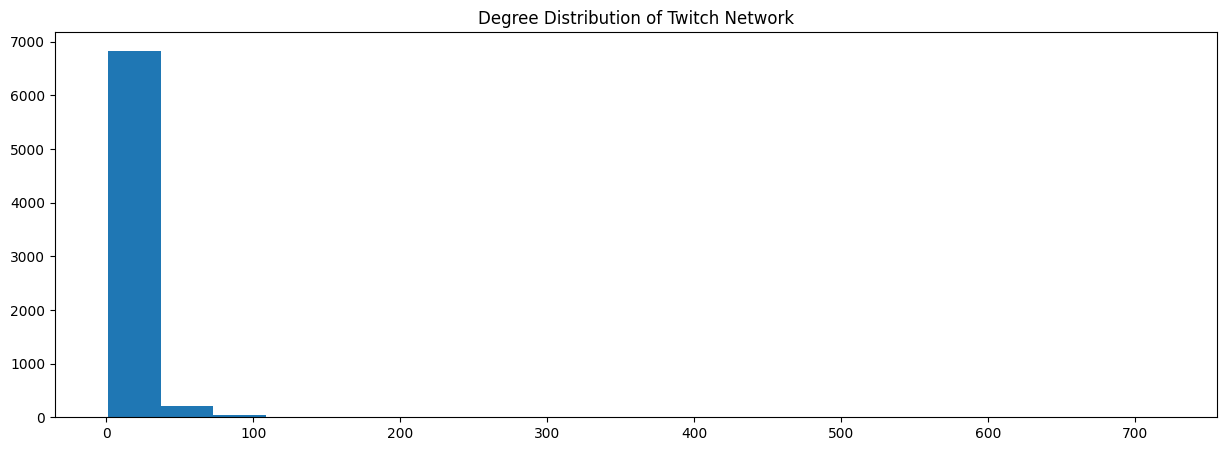

In [23]:
degrees = [G_twitch_en.degree(n) for n in G_twitch_en.nodes()]
plt.figure(figsize=(15, 5))
plt.hist(degrees, bins=20) 
plt.title('Degree Distribution of Twitch Network')
plt.show()

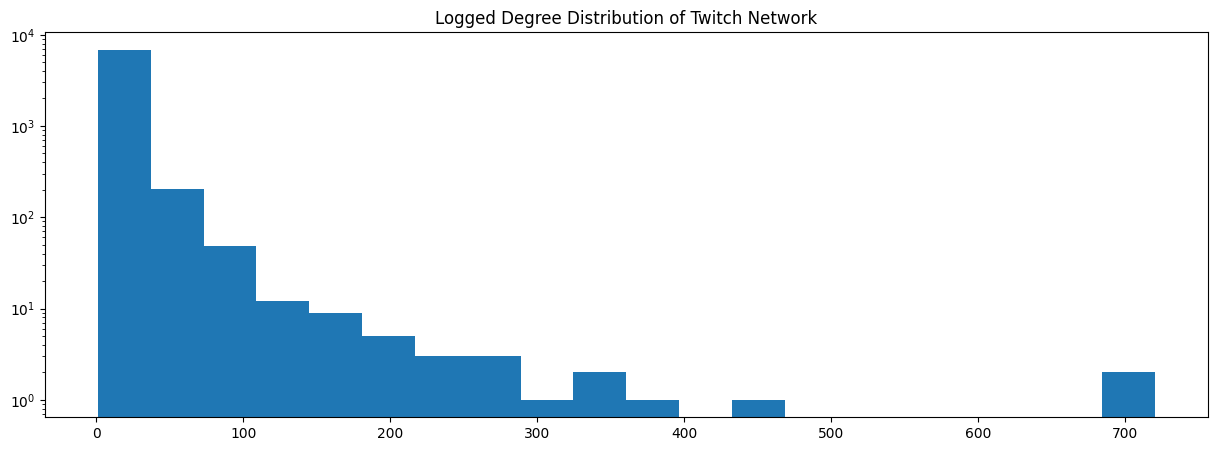

In [24]:
degrees = [G_twitch_en.degree(n) for n in G_twitch_en.nodes()]
plt.figure(figsize=(15, 5))
plt.hist(degrees, bins=20, log=True) 
plt.title('Logged Degree Distribution of Twitch Network')
plt.show()

### Density

In [25]:
nx.density(G_twitch_en)

0.0006957275310082672

### geodesic_distance

In [26]:
# Calculate geodesic distances between nodes
# refer: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.dense.floyd_warshall_numpy.html

# Define the file name
file_name = 'df_geodesic_distances.pkl'

# Check if the file exists in the directory
if os.path.exists(os.path.join(path_result, file_name)):
    # Read the pickle file into a pandas DataFrame
    geodesic_distances = pd.read_pickle(os.path.join(path_result, file_name))
else:
    # Calculate geodesic distances
    geodesic_distances = nx.floyd_warshall_numpy(G_twitch_en, nodelist=ls_nodes)
    
    # Save the geodesic distances to a pickle file
    pd.to_pickle(geodesic_distances, os.path.join(path_result, file_name))

df_geodesic_distances = pd.DataFrame(geodesic_distances, index=ls_nodes, columns=ls_nodes)
df_geodesic_distances

,0,1,2,3,4,5,6,7,8,9,...,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125
0,0.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,6.0,7.0,inf,6.0,4.0,4.0,6.0,inf,5.0,inf
1,inf,0.0,inf,inf,inf,inf,inf,inf,inf,inf,...,4.0,3.0,inf,3.0,4.0,3.0,4.0,inf,4.0,inf
2,inf,inf,0.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,3.0,5.0,inf,inf,inf
3,inf,inf,inf,0.0,inf,inf,inf,inf,inf,inf,...,3.0,5.0,inf,4.0,4.0,4.0,5.0,inf,4.0,inf
4,inf,inf,inf,inf,0.0,inf,inf,inf,inf,inf,...,inf,6.0,inf,inf,inf,5.0,6.0,inf,4.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,0.0,inf,inf,inf,inf
7122,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,0.0,inf,inf,inf
7123,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,0.0,inf,inf
7124,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,0.0,inf


In [27]:
df_geodesic_distances.replace([np.inf, -np.inf], np.nan, inplace=True)

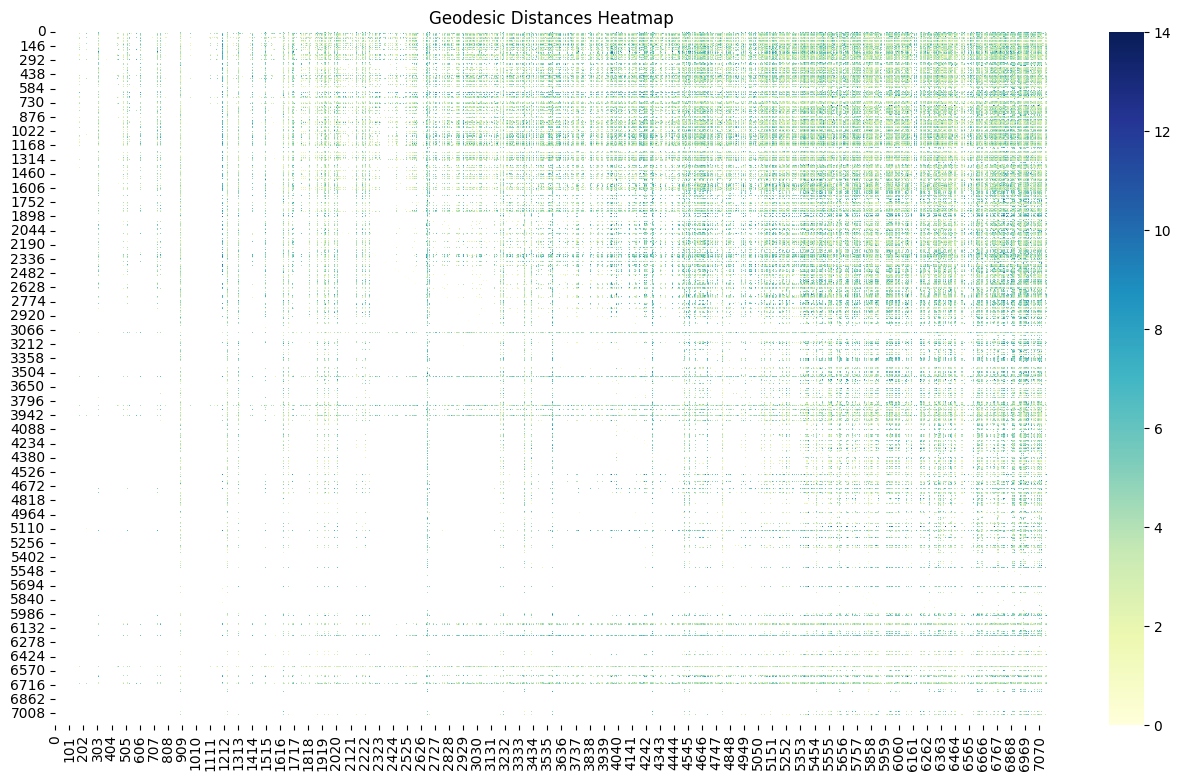

In [28]:
# Create a heatmap of the geodesic distances
plt.figure(figsize=(16, 9))
sns.heatmap(df_geodesic_distances, cmap='YlGnBu')
plt.title('Geodesic Distances Heatmap')
plt.show()

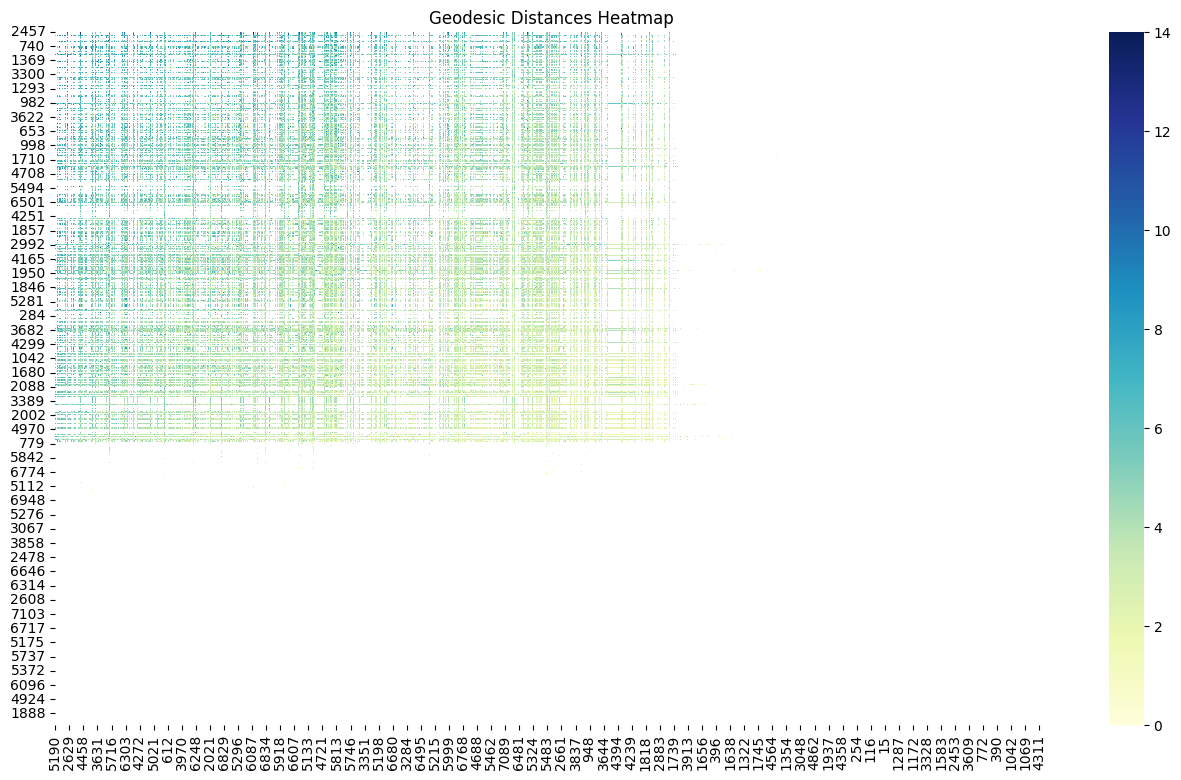

In [29]:
# Sort columns by their mean values in descending order
sorted_columns = df_geodesic_distances.mean().sort_values(ascending=False).index
df_sorted_columns = df_geodesic_distances[sorted_columns]

# Sort rows by their mean values in descending order
sorted_rows = df_sorted_columns.mean(axis=1).sort_values(ascending=False).index
df_sorted = df_sorted_columns.loc[sorted_rows]

# Create a heatmap of the geodesic distances
plt.figure(figsize=(16, 9))
sns.heatmap(df_sorted, cmap='YlGnBu')
plt.title('Geodesic Distances Heatmap')
plt.show()

In [30]:
ls_geodesic_distances = df_geodesic_distances.stack().dropna().tolist()
Counter(ls_geodesic_distances)

Counter({4.0: 2232585,
         3.0: 1785072,
         5.0: 1194747,
         2.0: 634400,
         6.0: 487272,
         7.0: 172796,
         8.0: 59416,
         1.0: 35324,
         9.0: 19314,
         0.0: 7126,
         10.0: 6048,
         11.0: 1705,
         12.0: 455,
         13.0: 77,
         14.0: 9})

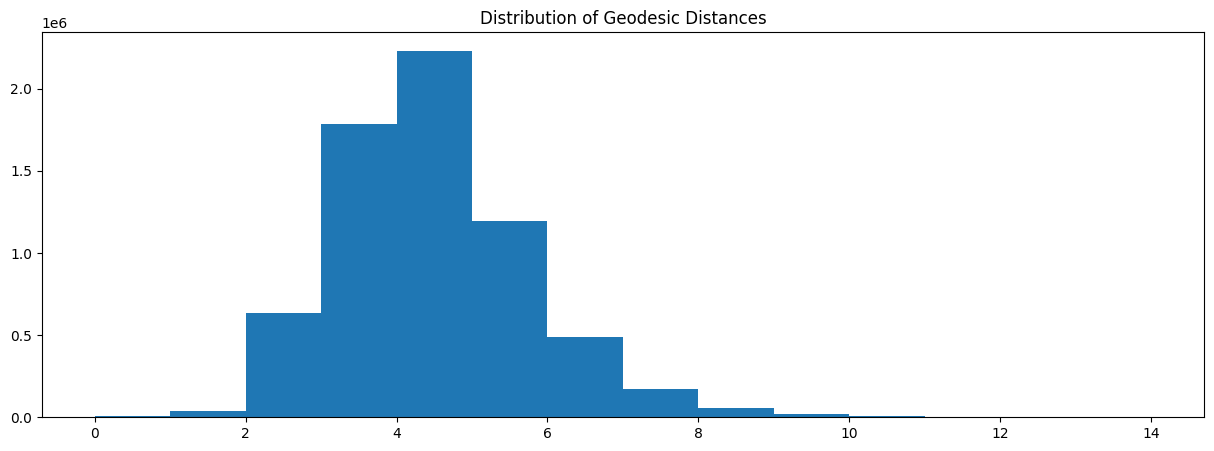

In [31]:
plt.figure(figsize=(15, 5))
plt.hist(ls_geodesic_distances, bins=14, log=False) 
plt.title('Distribution of Geodesic Distances')
plt.show()

### Eccentricity

In [32]:
# refer: https://networkx.org/documentation/latest/_modules/networkx/algorithms/distance_measures.html#eccentricity
# Redefined networkx eccentricity. Will returen np.nan instead of throwing an error on "found infinite path" now.
def eccentricity_safe(G, v=None, sp=None, weight=None):
    """Returns the eccentricity of nodes in G.

    The eccentricity of a node v is the maximum distance from v to
    all other nodes in G.

    Parameters
    ----------
    G : NetworkX graph
       A graph

    v : node, optional
       Return value of specified node

    sp : dict of dicts, optional
       All pairs shortest path lengths as a dictionary of dictionaries

    weight : string, function, or None (default=None)
        If this is a string, then edge weights will be accessed via the
        edge attribute with this key (that is, the weight of the edge
        joining `u` to `v` will be ``G.edges[u, v][weight]``). If no
        such edge attribute exists, the weight of the edge is assumed to
        be one.

        If this is a function, the weight of an edge is the value
        returned by the function. The function must accept exactly three
        positional arguments: the two endpoints of an edge and the
        dictionary of edge attributes for that edge. The function must
        return a number.

        If this is None, every edge has weight/distance/cost 1.

        Weights stored as floating point values can lead to small round-off
        errors in distances. Use integer weights to avoid this.

        Weights should be positive, since they are distances.

    Returns
    -------
    ecc : dictionary
       A dictionary of eccentricity values keyed by node.

    Examples
    --------
    >>> G = nx.Graph([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (4, 5)])
    >>> dict(nx.eccentricity(G))
    {1: 2, 2: 3, 3: 2, 4: 2, 5: 3}

    >>> dict(nx.eccentricity(G, v=[1, 5]))  # This returns the eccentricity of node 1 & 5
    {1: 2, 5: 3}

    """
    #    if v is None:                # none, use entire graph
    #        nodes=G.nodes()
    #    elif v in G:               # is v a single node
    #        nodes=[v]
    #    else:                      # assume v is a container of nodes
    #        nodes=v
    order = G.order()
    e = {}
    for n in G.nbunch_iter(v):
        if sp is None:
            length = nx.shortest_path_length(G, source=n, weight=weight)

            L = len(length)
            
        else:
            try:
                length = sp[n]
                L = len(length)
            except TypeError as err:
                raise nx.NetworkXError('Format of "sp" is invalid.') from err
        # if L != order:
        #     # if G.is_directed():
        #     #     msg = (
        #     #         "Found infinite path length because the digraph is not"
        #     #         " strongly connected"
        #     #     )
        #     # else:
        #     #     msg = "Found infinite path length because the graph is not" " connected"
        #     e[n] = 0
        e[n] = max(length.values())

        

    if v in G:
        return e[v]  # return single value
    return e

In [33]:
eccentricities = eccentricity_safe(G_twitch_en)
print("Eccentricity of each node:")
pprint(eccentricities)

Eccentricity of each node:
{0: 10,
 1: 9,
 2: 6,
 3: 8,
 4: 9,
 5: 10,
 6: 9,
 7: 10,
 8: 1,
 9: 9,
 10: 1,
 11: 11,
 12: 1,
 13: 9,
 14: 7,
 15: 10,
 16: 9,
 17: 9,
 18: 9,
 19: 8,
 20: 9,
 21: 9,
 22: 7,
 23: 8,
 24: 10,
 25: 9,
 26: 9,
 27: 8,
 28: 7,
 29: 9,
 30: 8,
 31: 5,
 32: 8,
 33: 9,
 34: 8,
 35: 10,
 36: 9,
 37: 9,
 38: 7,
 39: 8,
 40: 8,
 41: 8,
 42: 10,
 43: 9,
 44: 8,
 45: 8,
 46: 8,
 47: 9,
 48: 10,
 49: 11,
 50: 0,
 51: 7,
 52: 7,
 53: 7,
 54: 11,
 55: 9,
 56: 8,
 57: 1,
 58: 9,
 59: 2,
 60: 9,
 61: 7,
 62: 9,
 63: 8,
 64: 8,
 65: 7,
 66: 8,
 67: 2,
 68: 0,
 69: 8,
 70: 9,
 71: 1,
 72: 11,
 73: 9,
 74: 10,
 75: 8,
 76: 9,
 77: 9,
 78: 10,
 79: 2,
 80: 9,
 81: 9,
 82: 9,
 83: 9,
 84: 10,
 85: 8,
 86: 8,
 87: 7,
 88: 7,
 89: 9,
 90: 8,
 91: 9,
 92: 9,
 93: 7,
 94: 7,
 95: 8,
 96: 10,
 97: 12,
 98: 10,
 99: 7,
 100: 8,
 101: 10,
 102: 9,
 103: 1,
 104: 8,
 105: 7,
 106: 9,
 107: 9,
 108: 8,
 109: 4,
 110: 1,
 111: 3,
 112: 9,
 113: 9,
 114: 8,
 115: 9,
 116: 1,
 117: 1,
 1

In [34]:
Counter(eccentricities.values())

Counter({0: 1679,
         8: 1086,
         9: 1044,
         7: 874,
         10: 559,
         1: 483,
         2: 288,
         6: 259,
         11: 234,
         3: 210,
         5: 170,
         4: 131,
         12: 86,
         13: 17,
         14: 6})

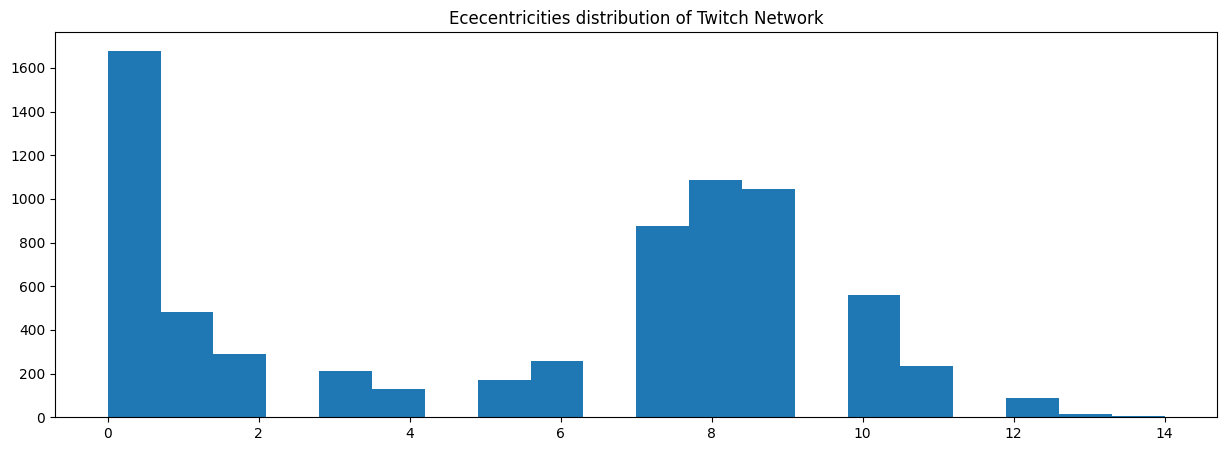

In [35]:
plt.figure(figsize=(15, 5))
plt.hist(eccentricities.values(), bins=20) 
plt.title('Ececentricities distribution of Twitch Network')
plt.show()

### diameter

In [36]:
# weakly connected graph
# https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab
# diameter = nx.diameter(G_twitch_en)
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G_twitch_en)])
print("Diameter of the social network:", diameter)

Diameter of the social network: 14


### Centralities

#### Degrees of centrality

In [37]:
degree_centrality = dict(G_twitch_en.degree)
print("Ordered by degree:")
pprint(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))

Ordered by degree:
[(1773, 720),
 (4949, 691),
 (3401, 465),
 (6136, 378),
 (166, 352),
 (5842, 336),
 (1924, 316),
 (2732, 278),
 (2447, 272),
 (1103, 254),
 (581, 252),
 (4196, 231),
 (4016, 226),
 (3706, 199),
 (2740, 193),
 (2481, 186),
 (3285, 183),
 (4406, 182),
 (2345, 167),
 (1598, 167),
 (6716, 155),
 (93, 154),
 (1883, 151),
 (2466, 150),
 (5269, 147),
 (792, 146),
 (3902, 146),
 (5945, 140),
 (2352, 137),
 (2997, 135),
 (2887, 134),
 (5345, 130),
 (24, 122),
 (5428, 122),
 (1059, 121),
 (2781, 121),
 (4639, 115),
 (1414, 113),
 (1869, 112),
 (5969, 108),
 (2845, 106),
 (3867, 104),
 (877, 103),
 (2026, 103),
 (2201, 102),
 (4374, 102),
 (4076, 101),
 (2262, 101),
 (5569, 100),
 (675, 100),
 (2825, 99),
 (6357, 98),
 (485, 97),
 (5338, 93),
 (372, 93),
 (2928, 93),
 (4140, 91),
 (26, 91),
 (4444, 91),
 (2719, 91),
 (2529, 90),
 (1812, 90),
 (4242, 86),
 (2779, 85),
 (932, 83),
 (5138, 83),
 (5802, 82),
 (6056, 82),
 (2439, 81),
 (3577, 81),
 (2106, 80),
 (1402, 80),
 (1169, 8

In [38]:
# Find the actor(s) with the highest degree centrality
max_degree_centrality = max(degree_centrality.values())
actors_with_highest_degree_centrality = [
    actor
    for actor, centrality in degree_centrality.items()
    if centrality == max_degree_centrality
]

print(
    "Actor(s) with the highest degree centrality:",
    actors_with_highest_degree_centrality,
    "\n with degree cententrality:",
    max_degree_centrality,
)

Actor(s) with the highest degree centrality: [1773] 
 with degree cententrality: 720


#### closeness centrality

In [39]:
# Calculate closeness centrality for each actor
# Standardized
closeness_centrality = nx.closeness_centrality(G_twitch_en)
# De-standardize
for key in closeness_centrality:
    closeness_centrality[key] /= (len(ls_nodes)-1)
print("Ordered by degree:")
pprint(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True))

Ordered by degree:
[(2345, 2.7910068398731722e-05),
 (6921, 2.770697828989774e-05),
 (5842, 2.7584603374988796e-05),
 (5269, 2.6411773182292433e-05),
 (6917, 2.6028828110500883e-05),
 (4793, 2.58708635998008e-05),
 (5969, 2.572560927458724e-05),
 (7065, 2.5294760027702302e-05),
 (6121, 2.5037881429262055e-05),
 (6931, 2.4513900913523193e-05),
 (4135, 2.447875263726001e-05),
 (6001, 2.4424055306017018e-05),
 (6731, 2.439283726537537e-05),
 (6853, 2.433436057219593e-05),
 (6741, 2.4039008556536167e-05),
 (6750, 2.4033584947655446e-05),
 (6206, 2.3941643230434038e-05),
 (5945, 2.3836971129256746e-05),
 (4949, 2.3782610136338375e-05),
 (5979, 2.3751937008455242e-05),
 (6345, 2.3731082686209805e-05),
 (6702, 2.3698870557525487e-05),
 (6404, 2.366680216221458e-05),
 (6903, 2.3500550400784545e-05),
 (6955, 2.347047734083326e-05),
 (6810, 2.3457510520020626e-05),
 (6359, 2.3437451887368344e-05),
 (7069, 2.3369863781567404e-05),
 (6168, 2.3364010293696436e-05),
 (5555, 2.3300518685061597e-05),


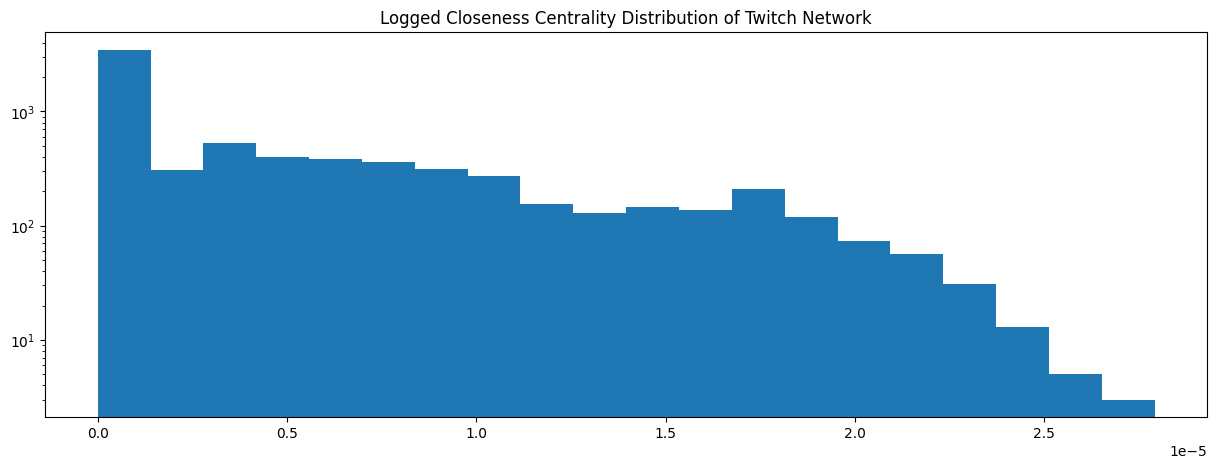

In [40]:
plt.figure(figsize=(15, 5))
plt.hist(closeness_centrality.values(), bins=20, log=True) 
plt.title('Logged Closeness Centrality Distribution of Twitch Network')
plt.show()

In [41]:
# Find the actor(s) with the highest closeness centrality
max_closeness = max(closeness_centrality.values())
actors_with_highest_closeness = [
    node
    for node, centrality in closeness_centrality.items()
    if centrality == max_closeness
]

print(
    "Actor(s) with the highest closeness centrality:",
    actors_with_highest_closeness,
    "\n with closeness cententrality:",
    max_closeness,
)

Actor(s) with the highest closeness centrality: [2345] 
 with closeness cententrality: 2.7910068398731722e-05


#### betweenness centrality

In [42]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_twitch_en)
# De-standardize
g = (len(ls_nodes)-1)
ad = (g-1)*(g-2)/2
for key in betweenness_centrality:
    betweenness_centrality[key] *= ad
print("Ordered by degree:")
sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

Ordered by degree:


[(4949, 429475.3937610972),
 (1773, 367677.8561076152),
 (3401, 292620.37320862117),
 (6136, 179123.98172432947),
 (2447, 142554.07719587657),
 (2732, 140884.4326648852),
 (1924, 123011.95418693493),
 (4196, 121736.7838822636),
 (5842, 107310.73855700063),
 (3706, 103667.90808189537),
 (6716, 95993.37544103898),
 (3285, 79802.09571173631),
 (4016, 79096.13683333967),
 (2997, 77185.62723569867),
 (2481, 68769.5831878431),
 (4639, 62530.330911674144),
 (2740, 62212.43944867312),
 (2466, 57124.22747324052),
 (5345, 50560.64842783583),
 (3902, 49859.17323779411),
 (2887, 48602.263905082975),
 (4374, 47628.92446868511),
 (3867, 47009.29445542716),
 (4406, 46094.24411447096),
 (1103, 39064.687435508866),
 (1883, 35416.045878662706),
 (4568, 34525.88426158268),
 (2781, 34329.061699491256),
 (2186, 32991.13289171833),
 (1869, 32340.90944546562),
 (4439, 31862.874776007324),
 (1598, 31777.570516717697),
 (2845, 31415.637499355398),
 (2928, 30206.86915451529),
 (2262, 29779.20437085682),
 (5338,

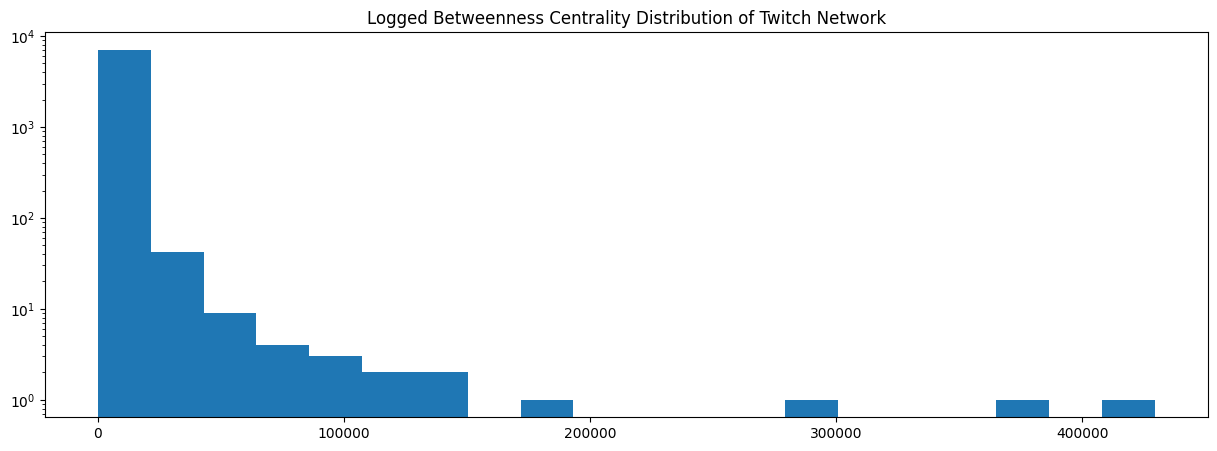

In [43]:
plt.figure(figsize=(15, 5))
plt.hist(betweenness_centrality.values(), bins=20, log=True) 
plt.title('Logged Betweenness Centrality Distribution of Twitch Network')
plt.show()

In [44]:
# Find the actor(s) with the highest betweenness centrality
max_betweenness = max(betweenness_centrality.values())
actors_with_highest_betweenness = [
    node
    for node, centrality in betweenness_centrality.items()
    if centrality == max_betweenness
]

print(
    "Actor(s) with the highest betweenness centrality:",
    actors_with_highest_betweenness,
    "\n with betweenness cententrality:",
    max_betweenness,
)

Actor(s) with the highest betweenness centrality: [4949] 
 with betweenness cententrality: 429475.3937610972


#### compare centralities

In [45]:
# compare max centrality
pd.DataFrame(
    (
        (
            "Degree Centrality",
            actors_with_highest_degree_centrality,
            max_degree_centrality,
        ),
        ("Closeness Centrality", actors_with_highest_closeness, max_closeness),
        ("Between Centrality", actors_with_highest_betweenness, max_betweenness),
    ),
    columns=["Centrality", "Highest", "Value"],
)

,Centrality,Highest,Value
0,Degree Centrality,[1773],720.000000
1,Closeness Centrality,[2345],0.000028
2,Between Centrality,[4949],429475.393761


In [46]:
# Create a dataframe from the dictionaries
df_centrality = pd.DataFrame(
    {
        "Node": degree_centrality.keys(),
        "DegreeCentrality": degree_centrality.values(),
        "ClosenessCentrality": closeness_centrality.values(),
        "BetweennessCentrality": betweenness_centrality.values(),
    }
)

# Add rank to 'DegreeCentrality', 'ClosenessCentrality', and 'BetweennessCentrality'
df_centrality['DegreeCentralityRank'] = df_centrality['DegreeCentrality'].rank(ascending=False)
df_centrality['ClosenessCentralityRank'] = df_centrality['ClosenessCentrality'].rank(ascending=False)
df_centrality['BetweennessCentralityRank'] = df_centrality['BetweennessCentrality'].rank(ascending=False)

# Calculate average rank of all three centrality measures
df_centrality['AverageRank'] = df_centrality[['DegreeCentralityRank', 'ClosenessCentralityRank', 'BetweennessCentralityRank']].mean(axis=1)

# Sort by the average rank
df_centrality = df_centrality.sort_values(by='AverageRank')
def make_pretty(styler):
    styler.set_caption("Node")
    styler.format({'BetweennessCentrality': "{:.2f}",
    'DegreeCentralityRank': "{:.1f}",
    'ClosenessCentralityRank': "{:.1f}",
    'BetweennessCentralityRank': "{:.1f}",
    'AverageRank':"{:.1f}",
    })
    styler.background_gradient()
    return styler
# df_centrality = df_centrality.sort_values(by="DegreeCentrality",ascending=False)
df_centrality.head(50).style.pipe(make_pretty)

,Node,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,DegreeCentralityRank,ClosenessCentralityRank,BetweennessCentralityRank,AverageRank
21,5842,336,0.000028,107310.74,6.0,3.0,9.0,6.0
88,4949,691,0.000024,429475.39,2.0,19.0,1.0,7.3
55,5945,140,0.000024,27490.15,28.0,18.0,42.0,29.3
221,2345,167,0.000028,19554.98,19.5,1.0,75.0,31.8
264,5969,108,0.000026,23297.26,40.0,7.0,61.0,36.0
34,5269,147,0.000026,16535.93,25.0,4.0,97.0,42.0
487,5345,130,0.000020,50560.65,32.0,137.0,19.0,62.7
754,5428,122,0.000020,28199.75,33.5,146.0,39.0,72.8
310,5569,100,0.000021,16857.65,49.5,110.0,94.0,84.5
388,5138,83,0.000020,24921.00,65.5,139.0,50.0,84.8


## subsets

### Identify structure equivalent subsets

In [47]:
# Compute Euclidean distance
sociomatrix = nx.to_pandas_adjacency(G_twitch_en)
distances = euclidean_distances(sociomatrix)
distances = pd.DataFrame(distances, index=sociomatrix.index, columns=sociomatrix.index)

# Perform hierarchical clustering
Z = linkage(StandardScaler().fit_transform(sociomatrix), 'ward')



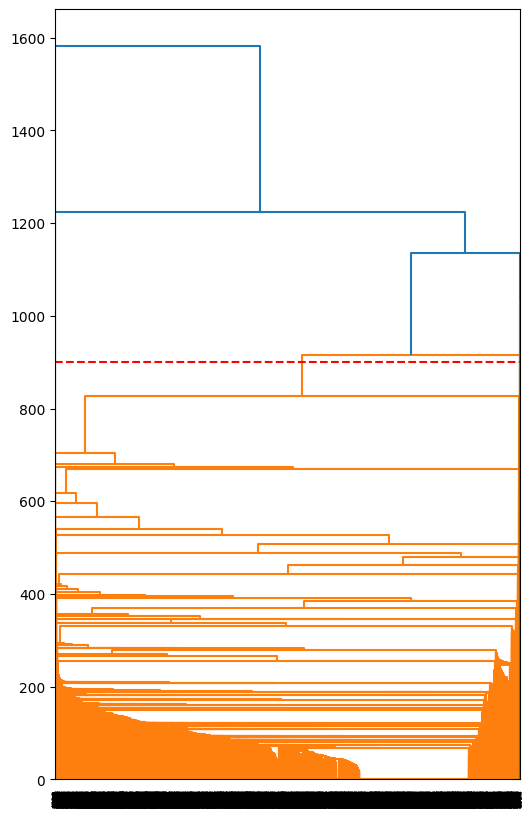

In [48]:
# Set the threshold
threshold = 900

# Plot dendrogram
plt.figure(figsize=(6, 10))
dendrogram(Z, labels=sociomatrix.index.tolist())
plt.axhline(y=threshold, color='r', linestyle='--')  # Threshold line
plt.show()

### Partition the socio matrix by the identified subsets

In [49]:
clusters = fcluster(Z, threshold, criterion='distance')
cluster_dict = {node: cluster for node, cluster in zip(sociomatrix.index, clusters)}
sorted_clusters = dict(sorted(cluster_dict.items(), key=lambda item: item[1]))
pprint(cluster_dict)

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 1,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 1,
 61: 1,
 62: 1,
 63: 1,
 64: 1,
 65: 1,
 66: 1,
 67: 1,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 1,
 78: 1,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 2,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 12

In [50]:
# Construct the density matrix
density_matrix = sociomatrix.groupby(cluster_dict).mean().T.groupby(cluster_dict).mean().T
density_matrix.style.format("{:.2f}").background_gradient()

,1,2,3,4,5,6,7
1,0.00,0.01,0.03,0.00,0.00,0.00,0.03
2,0.03,0.00,0.67,0.00,0.00,0.00,0.33
3,0.04,0.00,0.00,0.00,0.00,0.00,0.00
4,0.03,0.00,1.00,0.00,0.00,0.00,0.00
5,0.03,0.00,1.00,1.00,0.00,0.00,0.00
6,0.05,0.00,0.00,0.00,0.00,0.00,0.00
7,0.08,0.00,1.00,0.00,0.00,0.00,0.00


In [51]:
# Calculate overall density of the network
overall_density = sociomatrix.sum().sum() / (sociomatrix.shape[0] * (sociomatrix.shape[1] - 1))

# Construct the image matrix
image_matrix = (density_matrix >= overall_density).astype(int)
image_matrix.style.format("{:.0f}").background_gradient()

,1,2,3,4,5,6,7
1,0,1,1,1,1,0,1
2,1,0,1,0,0,0,1
3,1,0,0,0,0,0,0
4,1,0,1,0,0,0,0
5,1,0,1,1,0,0,0
6,1,0,0,0,0,0,0
7,1,0,1,0,0,0,0


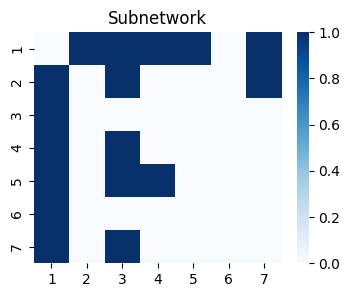

In [52]:
# Create a heatmap of the geodesic distances
plt.figure(figsize=(4,3 ))
sns.heatmap(image_matrix, cmap='Blues')
plt.title('Subnetwork')
plt.show()

Then we had the network reduced to 7 subsets

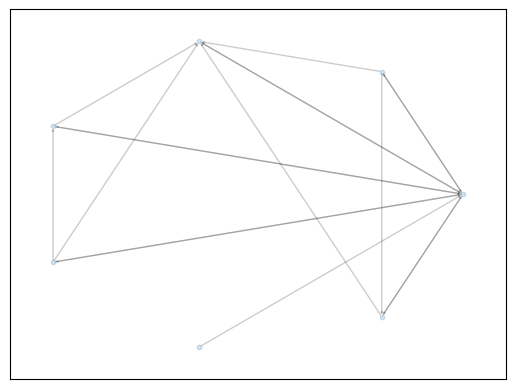

In [53]:
# Draw the reduced network （For large network）
G_reduced = nx.DiGraph()
G_reduced.add_nodes_from(set(cluster_dict.values()))
ties_reduced = [(i, j) for i in image_matrix.index for j in image_matrix.columns if image_matrix.loc[i, j] == 1]
G_reduced.add_edges_from(ties_reduced)

pos_reduced = nx.circular_layout(G_reduced)
nx.draw_networkx(G_reduced, pos_reduced, with_labels=False, node_size=10, arrowsize=2, alpha=0.2)
plt.show()

The interpretation of the reduced image matrix for this social network is as follows:

- **Cohesive subgroup**: The image matrix suggests the presence of cohesive subgroups, particularly for clusters 1, 3, 4, and 5, which have a higher density of ties within themselves and with certain other clusters. The presence of cohesive subgroups suggests that there are groups of users who interact more frequently with each other than with the rest of the network. These could be communities centered around specific games, interests, or streaming activities.
- **Center-periphery structure**: Cluster 1, having connections to all other clusters, could represent a group of highly influential or popular Twitch users who are central to the network. These users might be streamers with larger followings who connect communities together. The peripheral clusters may represent more niche communities or viewers who interact primarily with these central figures but not as much with each other.
- **Centralized system**: The centrality of cluster 1 suggests that this group of users might have a significant influence on the flow of information, trends, or culture within the Twitch network. They could be key content creators or highly active users who are central to the network's social dynamics.
- **Hierarchy**: The image matrix does not clearly indicate a strict hierarchy, as there are reciprocal ties between some clusters (e.g., clusters 1 and 3, 1 and 4, 1 and 5), which is not typical for a strict hierarchical structure. While the network does not show a strict hierarchy, the central position of cluster 1 and its connections to other clusters might indicate a form of informal hierarchy based on popularity, influence, or activity level.
- **Transitive system**: The lack of clear transitivity does not suggest a strict pecking order or dominance hierarchy among the clusters. Instead, the mutual friendships indicate a more egalitarian structure where users may form connections based on shared interests rather than hierarchical status.

Overall, the Twitch social network appears to have a core group of influential users surrounded by communities that are more loosely connected to each other. This structure is common in social media networks, where certain individuals or groups act as hubs, connecting various parts of the network and facilitating interactions among users.